Установка бибилиотек

In [ ]:
pip install matplotlib

Этот код импортирует необходимые библиотеки Python и подготавливает набор данных “Ирис” для визуализации.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd #работы с данными в формате таблиц (DataFrame)
from sklearn.datasets import load_iris #загружает классический набор данных о цветах ирисов Фишера
iris = load_iris()#загруженный набор данных в переменную iris.
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) #Создает объект DataFrame из данных, содержащихся в iris.data. iris.feature_names
df['species'] = iris.target_names[iris.target]#Добавляет новый столбец species в DataFrame df, содержащий названия видов ирисов (setosa, versicolor, virginica) на основе данных из iris.target
df['index'] = df.index #Добавляет новый столбец index, содержащий индексы строк DataFrame (от 0 до 149)

# Она группирует данные в df по двум столбцам: species (вид ириса) и index (номер наблюдения).
#Затем, для каждой группы, вычисляется среднее значение длины чашелистика ('sepal length (cm)') с помощью функции agg... сбрасывает индексы, создавая стандартный DataFrame с индексами от 0 до N.
grouped = df.groupby(['species', 'index']).agg({'sepal length (cm)': 'mean'}).reset_index()

1. Гистограмма: Графическое представление распределения частоты непрерывной переменной.

Низкоуровневый контроль. Нужно явно указывать количество интервалов (bins). Простой, но может потребовать дополнительного кода для стилизации.

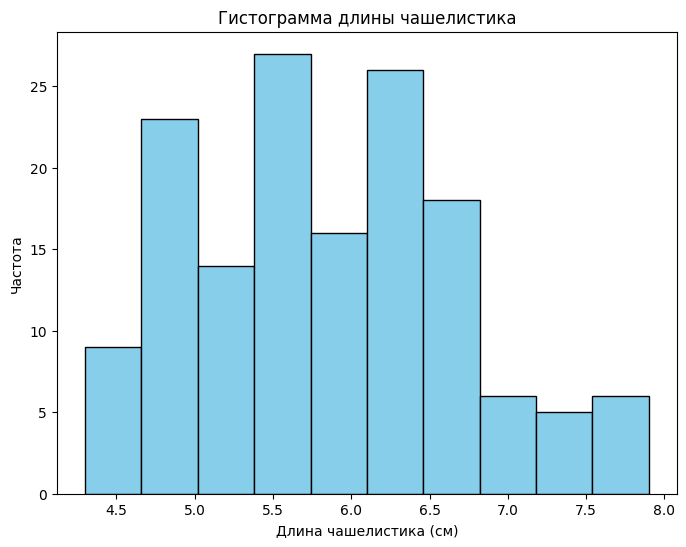

In [ ]:
# Установка размера рисунка
plt.figure(figsize=(8, 6))

# Создание гистограммы
# df['sepal length (cm)']:  Данные, для которых строится гистограмма (длина чашелистика).
# bins=10:  Количество столбцов гистограммы.
# color='skyblue':  Цвет столбцов гистограммы.
# edgecolor='black':  Цвет границ столбцов гистограммы.
plt.hist(df['sepal length (cm)'], bins=10, color='skyblue', edgecolor='black')

# Добавление подписей к осям
plt.xlabel('Длина чашелистика (см)')
plt.ylabel('Частота')

# Добавление заголовка графика
plt.title('Гистограмма распределения длины чашелистиков')

# Отображение графика
plt.show()

#bins=10: Определяет количество интервалов (корзин) на гистограмме

Matplotlib дает больший контроль над деталями, а Plotly добавляет интерактивность.

2. Диаграмма рассеяния (Scatter plot): График, показывающий взаимосвязь между двумя переменными.
Matplotlib:

Полный контроль над стилем и элементами графика, но требует больше кода для создания базового графика, особенно если нужно разделять данные по категориям (видам ирисов в данном случае).

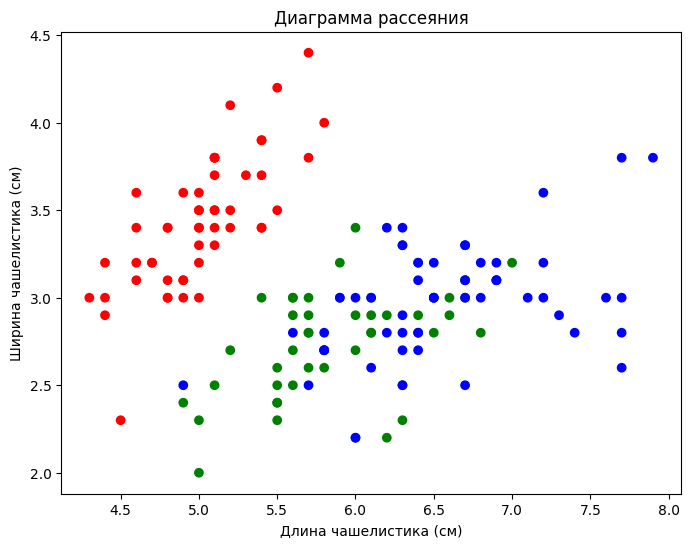

In [ ]:
# Установка размера рисунка
plt.figure(figsize=(8, 6))

# Создание диаграммы рассеяния
# df['sepal length (cm)']: Данные для оси X (длина чашелистика).
# df['sepal width (cm)']: Данные для оси Y (ширина чашелистика).
# c=df['species'].map({'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}):  Задаёт цвет точек в зависимости от вида ириса.  `map` создает отображение: 'setosa' -> 'red', 'versicolor' -> 'green', 'virginica' -> 'blue'.
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species'].map({'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}))

# Добавление подписей к осям
plt.xlabel('Длина чашелистика (см)')
plt.ylabel('Ширина чашелистика (см)')

# Добавление заголовка графика
plt.title('Диаграмма рассеяния: Длина и ширина чашелистика по видам ирисов')

# Отображение графика
plt.show()

 Matplotlib предоставляет максимальный уровень контроля по сравнению с другими библиотеками, но требует больше кода.

3. Ящик с усами (Box plot): Графическое представление распределения данных, показывающее медиану, квартили и выбросы.
Matplotlib:

Полный контроль, но требует больше кода для создания базового графика. Для более сложной кастомизации нужно приложить ещё больше усилий.

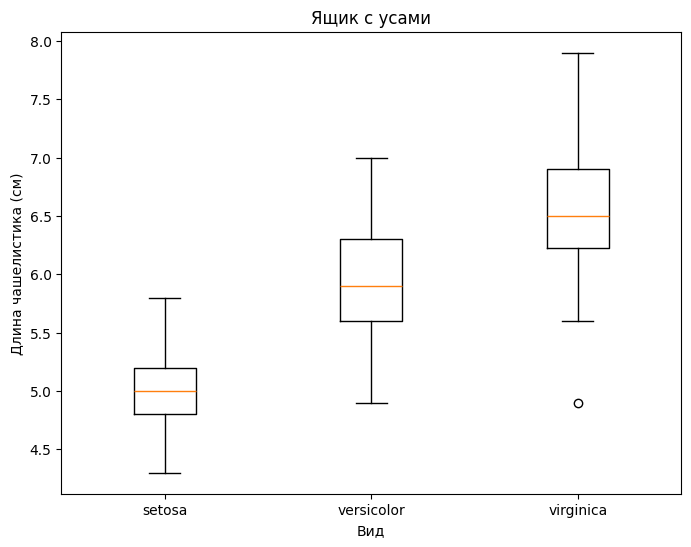

In [ ]:
# Установка размера рисунка
plt.figure(figsize=(8, 6))

# Создание графика "ящик с усами" с помощью Matplotlib
# [df[df['species'] == 'setosa']['sepal length (cm)'], ...]:  Список данных для каждого вида ирисов.  Каждая часть списка - это массив длин чашелистиков для соответствующего вида.
# labels=['setosa', 'versicolor', 'virginica']:  Метки для каждого ящика с усами.
plt.boxplot([df[df['species'] == 'setosa']['sepal length (cm)'],
             df[df['species'] == 'versicolor']['sepal length (cm)'],
             df[df['species'] == 'virginica']['sepal length (cm)']],
            labels=['setosa', 'versicolor', 'virginica'])

# Добавление подписей к осям
plt.xlabel('Вид')
plt.ylabel('Длина чашелистика (см)')

# Добавление заголовка графика
plt.title('Ящик с усами: Распределение длины чашелистиков по видам ирисов')

# Отображение графика
plt.show()

 Matplotlib требует немного больше кода по сравнению с другими библиотеками, но позволяет достичь более тонкой настройки

4. Линейный график: График, отображающий изменения переменной во времени или в зависимости от другой переменной.
Matplotlib: Здесь мы построили график, отображающий среднюю длину чашелистика для каждого индекса наблюдения.

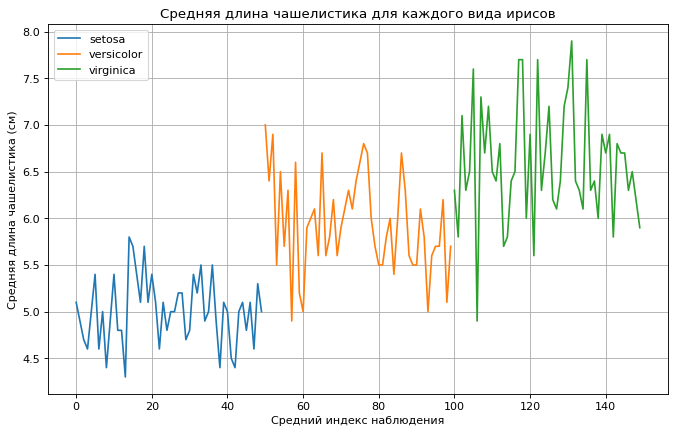

In [ ]:
# Установка размера и разрешения рисунка
plt.figure(figsize=(10, 6), dpi=80)  # dpi управляет разрешением изображения

# Цикл по каждому виду ирисов
for species in grouped['species'].unique():  # Получение уникальных значений видов из столбца 'species'
    # Фильтрация данных для текущего вида
    species_data = grouped[grouped['species'] == species]  # Выборка строк, соответствующих текущему виду

    # Построение линии графика
    # species_data['index']: Значения индекса на оси X.
    # species_data['sepal length (cm)']: Значения средней длины чашелистика на оси Y.
    # label=species:  Метка для легенды.
    plt.plot(species_data['index'], species_data['sepal length (cm)'], label=species)

# Добавление подписей к осям
plt.xlabel('Средний индекс наблюдения')
plt.ylabel('Средняя длина чашелистика (см)')

# Добавление заголовка графика
plt.title('Средняя длина чашелистика для каждого вида ирисов')

# Добавление легенды
plt.legend()

# Добавление сетки на график
plt.grid(True)

# Отображение графика
plt.show()

Matplotlib, дает самый большой уровень контроля по сравнению с другими библиотеками.

5. 3D Диаграммы рассеяний для библиотек Plotly, Matplotlib.

Matplotlib.

Этот пример показывает более низкоуровневый способ создания 3D-графиков в Matplotlib, где необходимо явно создать 3D-ось. Цикл, который обрабатывает каждый вид ирисов отдельно, создавая отдельный набор точек для каждого вида. Это важно, чтобы визуализация была понятной. Так же важен параметр s=40, устанавливающий размер точек на графике для лучшего восприятия.

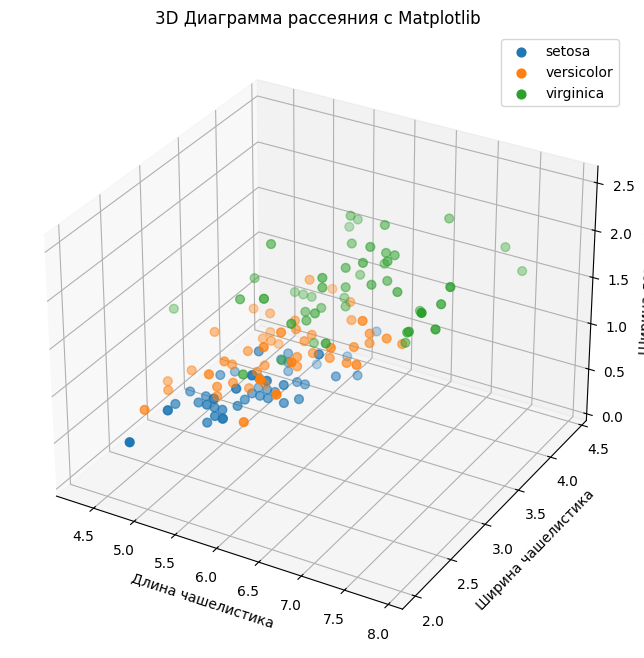

In [ ]:
# Создание фигуры и 3D подграфика
fig_mpl = plt.figure(figsize=(10, 8))  # Создание фигуры с заданным размером
ax = fig_mpl.add_subplot(111, projection='3d')  # Добавление 3D подграфика на фигуру

# Цикл по каждому виду ирисов
for species in df['species'].unique():  # Получение уникальных значений видов
    # Фильтрация данных для текущего вида
    species_df = df[df['species'] == species]  # Выборка данных для текущего вида

    # Построение точек на 3D графике
    # species_df['sepal length (cm)']:  Значения длины чашелистика для оси X.
    # species_df['sepal width (cm)']:  Значения ширины чашелистика для оси Y.
    # species_df['petal width (cm)']:  Значения ширины лепестка для оси Z.
    # label=species:  Метка для легенды.
    # s=40:  Размер маркеров (точек).
    ax.scatter(species_df['sepal length (cm)'], species_df['sepal width (cm)'], species_df['petal width (cm)'],
               label=species, s=40)

# Добавление подписей к осям
ax.set_xlabel('Длина чашелистика (см)')
ax.set_ylabel('Ширина чашелистика (см)')
ax.set_zlabel('Ширина лепестка (см)')

# Добавление заголовка
ax.set_title('3D Диаграмма рассеяния: Визуализация данных ирисов')

# Добавление легенды
ax.legend()

# Отображение графика
plt.show()

Matplotlib предоставляет больше контроля над деталями построения. Но в случае больших наборов данных или более сложных визуализаций, Plotly предлагает более эффективные способы для взаимодействия с графиком и восприятия данных.

**Вывод:**

Matplotlib, являясь низкоуровневой библиотекой, обеспечивает максимальную гибкость и контроль над каждым аспектом создаваемого графика. Это позволяет создавать высоконастраиваемые визуализации, отвечающие специфическим требованиям, но требует большего количества кода и времени на разработку. Matplotlib является основой для других библиотек, таких как Seaborn, и поэтому знание Matplotlib является полезным навыком для любого специалиста по работе с данными.